In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import emoji
import re

In [30]:
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv(r"C:\Users\JASWA\Documents\Projects_AI\Twitter_sentiment_Analysis_NLP\data\raw\training.1600000.processed.noemoticon.csv", 
                 encoding='latin-1', 
                 names=columns)
print(f"\nDataset shape: {df.shape}")


Dataset shape: (1600000, 6)


In [31]:
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [32]:
print(f"\nTotal tweets: {len(df):,}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")


Total tweets: 1,600,000
Columns: ['sentiment', 'id', 'date', 'query', 'user', 'text']

Data types:
sentiment     int64
id            int64
date         object
query        object
user         object
text         object
dtype: object

Missing values:
sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64


In [33]:
print(f"\nSentiment distribution:")
print(df['sentiment'].value_counts())


Sentiment distribution:
sentiment
0    800000
4    800000
Name: count, dtype: int64


In [34]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
print(f"\nAfter mapping:")
print(df['sentiment'].value_counts())
print(f"Negative: {(df['sentiment']==0).sum():,}")
print(f"Positive: {(df['sentiment']==1).sum():,}")


After mapping:
sentiment
0    800000
1    800000
Name: count, dtype: int64
Negative: 800,000
Positive: 800,000


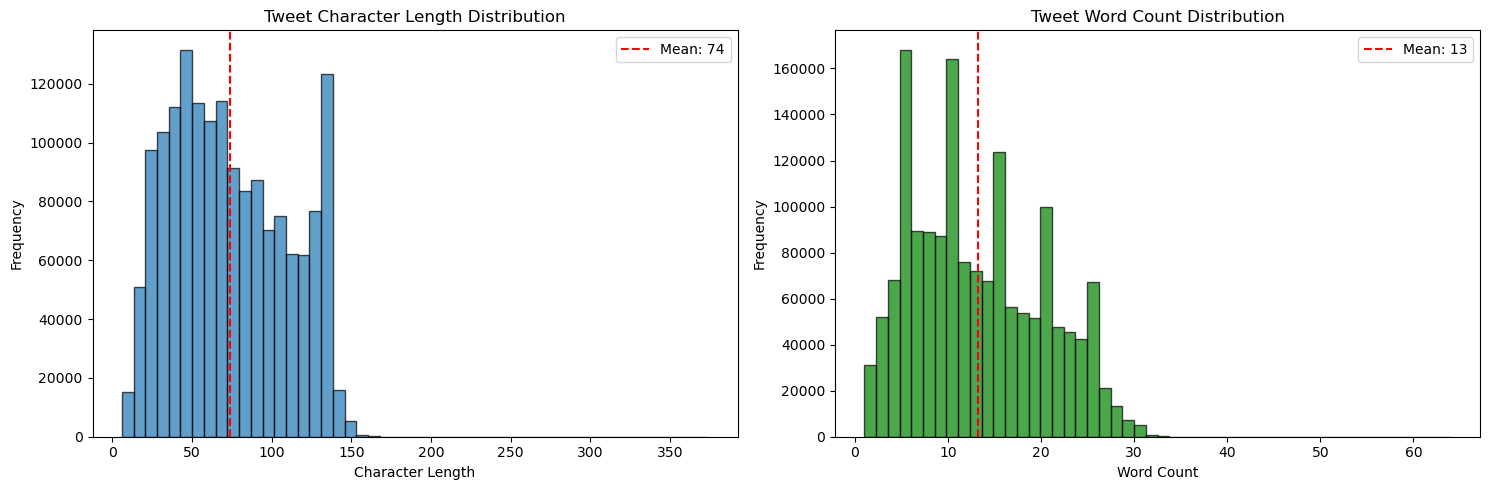


Average length by sentiment:
sentiment
0    74.301790
1    73.878433
Name: text_length, dtype: float64
sentiment
0    13.581984
1    12.770318
Name: word_count, dtype: float64


In [35]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(df['text_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Character Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Tweet Character Length Distribution')
axes[0].axvline(df['text_length'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["text_length"].mean():.0f}')
axes[0].legend()
axes[1].hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Tweet Word Count Distribution')
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["word_count"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../results/plots/text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"\nAverage length by sentiment:")
print(df.groupby('sentiment')['text_length'].mean())
print(df.groupby('sentiment')['word_count'].mean())

In [36]:
def extract_emojis(text):
    return [c for c in text if c in emoji.EMOJI_DATA]
df['emojis'] = df['text'].apply(extract_emojis)
df['emoji_count'] = df['emojis'].apply(len)
print(f"\nTweets with emojis: {(df['emoji_count'] > 0).sum():,} ({(df['emoji_count'] > 0).sum()/len(df)*100:.1f}%)")
print(f"Total emojis: {df['emoji_count'].sum():,}")
all_emojis = [em for emojis in df['emojis'] for em in emojis]
emoji_counts = Counter(all_emojis)
print(f"\nTop 10 most common emojis:")
for em, count in emoji_counts.most_common(10):
    print(f"{em}: {count:,}")
print(f"\nEmoji usage by sentiment:")
print(df.groupby('sentiment')['emoji_count'].mean())


Tweets with emojis: 956 (0.1%)
Total emojis: 1,510

Top 10 most common emojis:
©: 1,021
®: 489

Emoji usage by sentiment:
sentiment
0    0.000767
1    0.001120
Name: emoji_count, dtype: float64


In [37]:
def extract_hashtags(text):
    return re.findall(r'#\w+', text)
def extract_mentions(text):
    return re.findall(r'@\w+', text)
df['hashtags'] = df['text'].apply(extract_hashtags)
df['mentions'] = df['text'].apply(extract_mentions)
df['hashtag_count'] = df['hashtags'].apply(len)
df['mention_count'] = df['mentions'].apply(len)
print(f"\nTweets with hashtags: {(df['hashtag_count'] > 0).sum():,}")
print(f"Tweets with mentions: {(df['mention_count'] > 0).sum():,}")
all_hashtags = [tag for tags in df['hashtags'] for tag in tags]
hashtag_counts = Counter(all_hashtags)
print(f"\nTop 10 hashtags:")
for tag, count in hashtag_counts.most_common(10):
    print(f"{tag}: {count:,}")


Tweets with hashtags: 35,847
Tweets with mentions: 738,493

Top 10 hashtags:
#followfriday: 2,114
#fb: 1,747
#squarespace: 888
#FF: 586
#1: 519
#seb: 499
#FollowFriday: 463
#musicmonday: 405
#ff: 399
#iranelection: 359


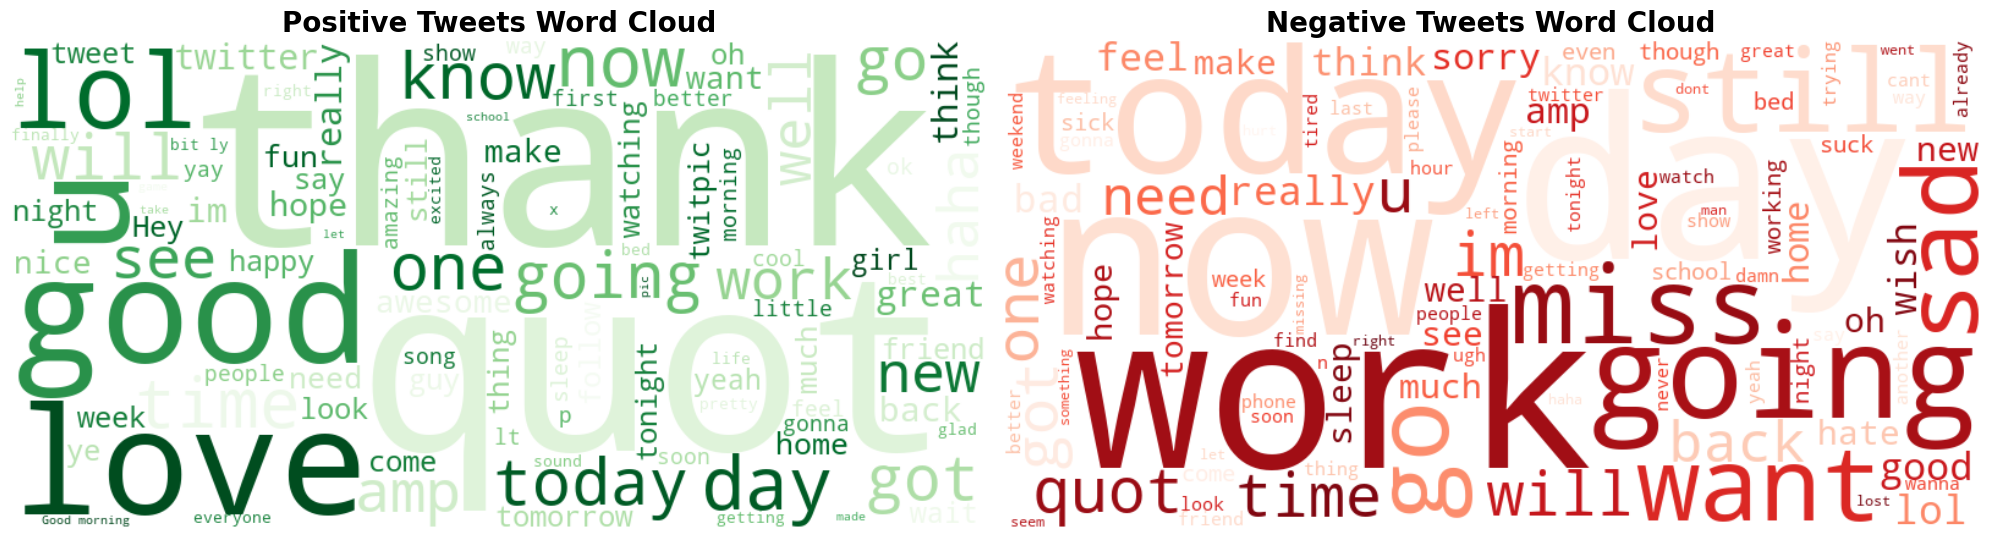

In [38]:
sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)
positive_text = ' '.join(df_sample[df_sample['sentiment']==1]['text'].values)
negative_text = ' '.join(df_sample[df_sample['sentiment']==0]['text'].values)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
wc_pos = WordCloud(width=800, height=400, 
                   background_color='white',
                   colormap='Greens',
                   max_words=100).generate(positive_text)

axes[0].imshow(wc_pos, interpolation='bilinear')
axes[0].set_title('Positive Tweets Word Cloud', fontsize=20, fontweight='bold')
axes[0].axis('off')
wc_neg = WordCloud(width=800, height=400,
                   background_color='white',
                   colormap='Reds',
                   max_words=100).generate(negative_text)
axes[1].imshow(wc_neg, interpolation='bilinear')
axes[1].set_title('Negative Tweets Word Cloud', fontsize=20, fontweight='bold')
axes[1].axis('off')
plt.tight_layout()
plt.savefig('../results/plots/wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
print("\n5 Random Positive Tweets:")
for i, tweet in enumerate(df[df['sentiment']==1].sample(5)['text'].values, 1):
    print(f"{i}. {tweet}")
print("\n5 Random Negative Tweets:")
for i, tweet in enumerate(df[df['sentiment']==0].sample(5)['text'].values, 1):
    print(f"{i}. {tweet}")


5 Random Positive Tweets:
1. @SteveHealy woo, well I hope it was worth your while 
2. @TangyFruits Absolutely!! My brother hooking me up with a rapidshare account is gangzz too! 
3. @nsolo4 November can't come fast enough! ahhhhh  graduation AND New Moon   what more could we bloody want!!
4. @jsrobertojr You should buy me one 
5. Do Dinosaur  still exists? I hope so..  -  http://tinyurl.com/q799jm

5 Random Negative Tweets:
1. @arameabonita whats wrong? 
2. @Yuhgelin No, hot is nothing compared with the weather we have here. This isn't hot, this is fire 
3.  I think I'm gonna die if I see another Smurf. Also if I don't speak with someone my age  HELP.
4. just dropped the wrong sodding database 
5. I failed my license test  looooooser


In [40]:
print(f"\nDuplicate tweets: {df['text'].duplicated().sum():,}")
very_short = (df['word_count'] < 2).sum()
print(f"Very short tweets (<2 words): {very_short:,}")
very_long = (df['word_count'] > 50).sum()
print(f"Very long tweets (>50 words): {very_long:,}")
empty_tweets = (df['text'].str.strip() == '').sum()
print(f"Empty tweets: {empty_tweets}")
print(f"- Average tweet length: {df['text_length'].mean():.0f} characters")
print(f"- Average word count: {df['word_count'].mean():.0f} words")
print(f"- {(df['emoji_count'] > 0).sum()/len(df)*100:.1f}% tweets contain emojis")


Duplicate tweets: 18,534
Very short tweets (<2 words): 5,978
Very long tweets (>50 words): 3
Empty tweets: 0
- Average tweet length: 74 characters
- Average word count: 13 words
- 0.1% tweets contain emojis
